In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits import mplot3d
from plotly.offline import download_plotlyjs, init_notebook_mode
from plotly.offline import plot, iplot
import plotly.graph_objects as go

In [2]:
path = r'/Users/meghanmcgrath/Documents'

In [3]:
climate = pd.read_csv(os.path.join(path, 'Data Sets', 'Dataset_Exercise_13.csv'))

In [4]:
climate.head()

Unnamed: 0      DATE  MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
0           0  19600101      1              6.5                 3.7   
1           1  19600102      1              6.1                 2.9   
2           2  19600103      1              8.5                 3.1   
3           3  19600104      1              6.3                 2.0   
4           4  19600105      1              3.0                 2.0   

   BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
0                 2.4               9.3                  10.0   
1                 2.3               7.7                   8.2   
2                 2.7               6.8                   7.1   
3                 2.0               6.7                   6.8   
4                 2.5               8.0                   7.7   

   GDANSK_temp_mean  HEATHROW_temp_mean  ...  LJUBLJANA_temp_mean  \
0               0.8                10.6  ...                 -0.6   
1               1.6                 6.1  ...                  2.1   
2               0.7                 8.4  ...                  4.6   
3              -0.1                 9.4  ...                  3.2   
4               0.4                 8.9  ...                  3.6   

   MAASTRICHT_temp_mean  MADRID_temp_mean  MUNCHENB_temp_mean  OSLO_temp_mean  \
0                   9.5               7.6                 6.9             4.9   
1                   8.6               9.8                 6.2             3.4   
2                   6.9               8.6                 5.8             1.9   
3                   7.0              10.3                 3.9             3.0   
4                   8.1              12.1                 1.8             3.7   

   ROMA_temp_mean  SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
0             7.8                 -5.9                  4.2             10.0   
1            12.2                 -9.5                  4.0              9.5   
2            10.2                 -9.5                  2.4             10.3   
3            10.8                -11.5                  1.2             11.2   
4             9.9                 -9.3                  3.3             11.4   

   VALENTIA_temp_mean  
0                 8.5  
1                 8.9  
2                10.5  
3                 7.4  
4                 5.7  

[5 rows x 21 columns]

In [5]:
# Drop the extra index columns

climate.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
climate.head()

DATE  MONTH  BASEL_temp_mean  BELGRADE_temp_mean  BUDAPEST_temp_mean  \
0  19600101      1              6.5                 3.7                 2.4   
1  19600102      1              6.1                 2.9                 2.3   
2  19600103      1              8.5                 3.1                 2.7   
3  19600104      1              6.3                 2.0                 2.0   
4  19600105      1              3.0                 2.0                 2.5   

   DEBILT_temp_mean  DUSSELDORF_temp_mean  GDANSK_temp_mean  \
0               9.3                  10.0               0.8   
1               7.7                   8.2               1.6   
2               6.8                   7.1               0.7   
3               6.7                   6.8              -0.1   
4               8.0                   7.7               0.4   

   HEATHROW_temp_mean  KASSEL_temp_mean  LJUBLJANA_temp_mean  \
0                10.6               7.9                 -0.6   
1                 6.1               7.7                  2.1   
2                 8.4               6.5                  4.6   
3                 9.4               5.8                  3.2   
4                 8.9               5.4                  3.6   

   MAASTRICHT_temp_mean  MADRID_temp_mean  MUNCHENB_temp_mean  OSLO_temp_mean  \
0                   9.5               7.6                 6.9             4.9   
1                   8.6               9.8                 6.2             3.4   
2                   6.9               8.6                 5.8             1.9   
3                   7.0              10.3                 3.9             3.0   
4                   8.1              12.1                 1.8             3.7   

   ROMA_temp_mean  SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
0             7.8                 -5.9                  4.2             10.0   
1            12.2                 -9.5                  4.0              9.5   
2            10.2                 -9.5                  2.4             10.3   
3            10.8                -11.5                  1.2             11.2   
4             9.9                 -9.3                  3.3             11.4   

   VALENTIA_temp_mean  
0                 8.5  
1                 8.9  
2                10.5  
3                 7.4  
4                 5.7

In [8]:
#Drop the DATE and MONTH data as those numbers are not scaled with the rest.
notemp = climate.drop(['DATE','MONTH'], axis=1)

MADRID 2018

In [9]:
#Reduce your dataset to a single year
dfyear_1 = climate[climate['DATE'].astype(str).str.contains('2018')] #<-----INSERT YEAR HERE
dfyear_1

DATE  MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
21185  20180101      1              7.7                 7.2   
21186  20180102      1              5.9                 7.4   
21187  20180103      1              9.2                 5.9   
21188  20180104      1             10.0                 7.8   
21189  20180105      1              9.3                10.9   
...         ...    ...              ...                 ...   
21545  20181227     12             -0.7                 3.6   
21546  20181228     12              1.3                 7.1   
21547  20181229     12              0.7                 4.8   
21548  20181230     12              3.3                 4.5   
21549  20181231     12              5.5                 4.1   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
21185                 3.9               6.8                   6.9   
21186                 5.4               6.5                   5.9   
21187                 5.0               8.8                   8.0   
21188                 7.8               8.2                   8.4   
21189                 7.5               6.4                   8.1   
...                   ...               ...                   ...   
21545                 5.6               0.8                   2.7   
21546                 7.2               2.3                   1.5   
21547                 5.8               7.9                   5.6   
21548                 4.7               8.5                   7.7   
21549                 4.5               8.9                   8.8   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
21185               7.0                 6.7               9.1   
21186               1.6                 7.9               9.1   
21187               2.9                 8.2               9.1   
21188               4.4                 9.5               9.1   
21189               5.5                 7.2               9.1   
...                 ...                 ...               ...   
21545               5.7                 5.4               9.1   
21546               5.8                 6.9               9.1   
21547               5.3                 9.8               9.1   
21548               5.0                 8.4               9.1   
21549               3.1                 9.4               9.1   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
21185                  4.7                   6.0               7.6   
21186                  2.0                   6.2              10.4   
21187                  3.6                   8.5              10.6   
21188                  1.9                   8.3              10.8   
21189                  7.0                   7.6               8.6   
...                    ...                   ...               ...   
21545                 -0.7                   1.9               6.2   
21546                 -0.6                   0.8               7.1   
21547                 -1.2                   4.6               8.0   
21548                 -0.2                   6.9               8.7   
21549                  2.5                   8.3               7.0   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
21185                 6.2             1.9            15.4   
21186                 4.4             0.1            15.4   
21187                 5.4            -0.9            15.4   
21188                 6.8             1.0            15.4   
21189                 9.7            -1.2            15.4   
...                   ...             ...             ...   
21545                -1.9             0.1            15.4   
21546                 1.2            -3.2            15.4   
21547                -0.1            -2.5            15.4   
21548                 2.8            -1.6            15.4   
21549                 3.4             1.6            15.4   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
21

In [10]:
#Drop the DATE and MONTH data as those numbers are not scaled with the rest.
notempyear_1 = dfyear_1.drop(['DATE','MONTH'], axis=1)

In [11]:
#We need to make an index for the year. Create a set of data from 1 to 365 (or to 366 if it's a leap year!)
#We'll scale this by 100 as the index is made. This will help teh gradient descent converge 366 = 3.66

i = np.arange(0.01,3.66,0.01) #<---needs to be one GREATER than the total number of days
index_1 = pd.DataFrame(data = i, columns = ['index'])
index_1

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
360   3.61
361   3.62
362   3.63
363   3.64
364   3.65

[365 rows x 1 columns]

In [13]:
n_rows_1 = dfyear_1.shape[0]
n_rows_1

365

In [16]:
#This will translate your chosen weather data into the X and y datasets needed for the optimization function.

X=index_1.to_numpy().reshape(n_rows_1,1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows_1,1))
X = np.concatenate((ones, X), axis=1)
y=dfyear_1['MADRID_temp_mean'].to_numpy().reshape(n_rows_1,1) #<----INSERT WEATHER STATION HERE

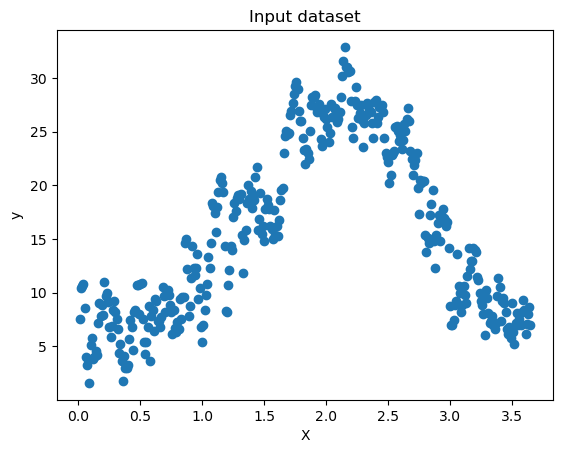

In [18]:
#Look at one year of temperature data over time
plt.scatter(x=index_1['index'], y=dfyear_1['MADRID_temp_mean']) #<----INSERT WEATHER STATION HERE
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');
plt.show()

In [19]:
dfyear_1['MADRID_temp_mean'].min()

1.6

In [21]:
dfyear_1['MADRID_temp_mean'].max()

32.9

In [23]:
#This computes the loss function for the gradiant descent. DO NOT CHANGE!

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [24]:
compute_cost(X,y)

array([153.13057534])

In [25]:
#This is the gradiant descent function. DO NOT CHANGE!

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [26]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=30 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[1],[1]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.05 #<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: user 30.4 ms, sys: 2.87 ms, total: 33.3 ms
Wall time: 30.8 ms


In [27]:
theta

array([[5.48700156],
       [4.76518714]])

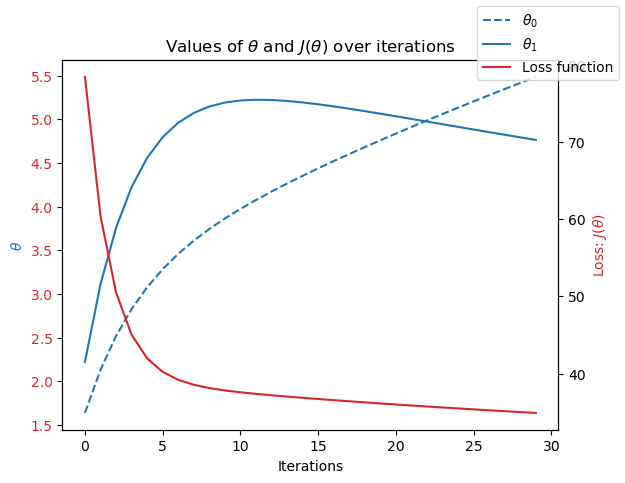

In [28]:
#This will plot your loss, theta0, and theta1.If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();

In [29]:
%%time
# theta range
theta0_vals = np.linspace(-10,10,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-10,10,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: user 1.13 s, sys: 28.4 ms, total: 1.15 s
Wall time: 1.13 s


In [30]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

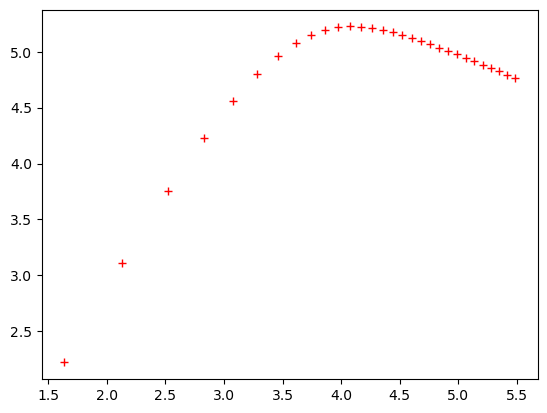

In [31]:
#Here is the same figure as above, with the line the loss function takes toward the minimum.

#X = Theta0
#Y - Theta1
#Z = Loss
#black line = path of loss function over the iterations.
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history, y=theta0_history, z=J_history, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history, theta1_history, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

In [32]:
#Rerun the optimization above, but this time start closer to the objective!
#Find where the black line ends near the lowest X/Y/Z coordinate and make that your guess below.

num_iterations=30 #<---start with the same iterations as above
theta_init=np.array([[4],[6]]) #<---make a guess as to a more accurate [x],[y] coordinates near the minimum in the graph above.
alpha= 0.05 #<---start with the same step size as above
theta1, J_history1, theta0_history1, theta1_history1 = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

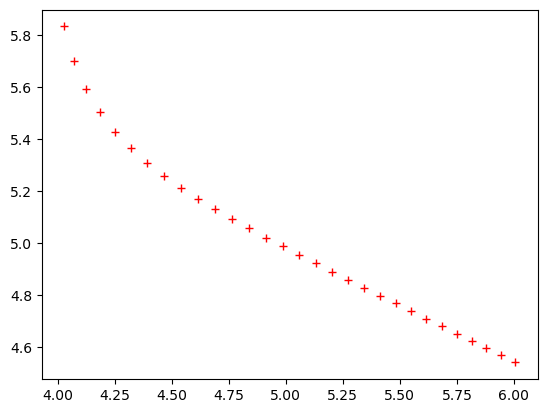

In [34]:
#Let's look at the new loss path on the function. It should start much closer to the goal

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history1, y=theta0_history1, z=J_history1, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history1, theta1_history1, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

BUDAPEST - 1997

In [36]:
#Reduce your dataset to a single year
dfyear_2 = climate[climate['DATE'].astype(str).str.contains('1997')] #<-----INSERT YEAR HERE
dfyear_2

DATE  MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
13515  19970101      1            -10.6                -4.1   
13516  19970102      1            -10.5                -2.6   
13517  19970103      1             -6.2                 0.8   
13518  19970104      1             -4.3                 2.5   
13519  19970105      1             -2.3                 0.9   
...         ...    ...              ...                 ...   
13875  19971227     12              6.3                 8.3   
13876  19971228     12              4.0                 4.4   
13877  19971229     12              1.3                 4.5   
13878  19971230     12              2.0                 4.8   
13879  19971231     12              4.4                 8.5   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
13515                -7.7             -11.4                 -14.2   
13516                -4.2             -12.6                 -14.6   
13517                -2.2              -7.7                  -6.5   
13518                 0.9              -4.1                  -4.9   
13519                 1.3              -5.3                  -3.8   
...                   ...               ...                   ...   
13875                 6.8               6.4                   6.0   
13876                 6.0               5.3                   5.4   
13877                 4.4               5.6                   5.0   
13878                 3.3               5.6                   6.0   
13879                -0.9               8.3                   8.6   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
13515             -18.0                -2.8             -14.4   
13516              -7.2                -2.5             -12.8   
13517             -11.4                -2.4              -7.5   
13518             -15.7                -0.7              -6.1   
13519              -9.7                 0.8              -5.9   
...                 ...                 ...               ...   
13875               5.0                 5.9               4.6   
13876               2.1                 4.0               3.1   
13877               1.8                 5.7               3.2   
13878               0.2                 7.9               3.4   
13879               0.6                 8.1               7.4   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
13515                 -7.7                 -14.9               3.6   
13516                 -5.3                 -11.4               3.8   
13517                 -3.8                  -7.5               2.5   
13518                 -0.8                  -5.2               2.8   
13519                  0.9                  -4.5               0.0   
...                    ...                   ...               ...   
13875                  3.8                   6.3               7.2   
13876                  2.0                   4.9               4.5   
13877                  0.6                   4.2               6.5   
13878                  1.3                   5.8               8.7   
13879                  6.2                   8.7               7.5   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
13515               -10.6           -11.5            12.3   
13516                -7.8            -8.4            13.1   
13517                -5.2           -13.8            14.1   
13518                -3.2           -14.4            10.0   
13519                -2.2           -10.4             8.0   
...                   ...             ...             ...   
13875                 4.0            -3.0             9.2   
13876                 2.3            -1.7             6.7   
13877                 0.8            -1.0             6.2   
13878                 1.3            -1.1             7.5   
13879                 4.4             1.1            10.6   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
13

In [37]:
#Drop the DATE and MONTH data as those numbers are not scaled with the rest.
notempyear_2 = dfyear_2.drop(['DATE','MONTH'], axis=1)

In [38]:
#We need to make an index for the year. Create a set of data from 1 to 365 (or to 366 if it's a leap year!)
#We'll scale this by 100 as the index is made. This will help teh gradient descent converge 366 = 3.66

i_2 = np.arange(0.01,3.66,0.01) #<---needs to be one GREATER than the total number of days
index_2 = pd.DataFrame(data = i_2, columns = ['index'])
index_2

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
360   3.61
361   3.62
362   3.63
363   3.64
364   3.65

[365 rows x 1 columns]

In [39]:
n_rows_2 = dfyear_2.shape[0]
n_rows_2

365

In [40]:
#This will translate your chosen weather data into the X and y datasets needed for the optimization function.

X=index_2.to_numpy().reshape(n_rows_2,1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows_2,1))
X = np.concatenate((ones, X), axis=1)
y=dfyear_2['BUDAPEST_temp_mean'].to_numpy().reshape(n_rows_2,1) #<----INSERT WEATHER STATION HERE

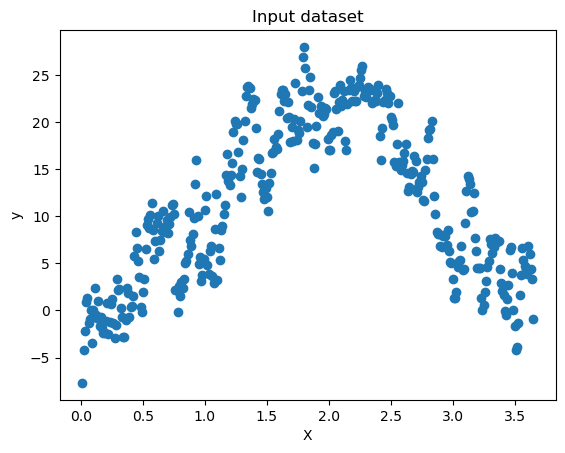

In [41]:
#Look at one year of temperature data over time
plt.scatter(x=index_2['index'], y=dfyear_2['BUDAPEST_temp_mean']) #<----INSERT WEATHER STATION HERE
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');

In [42]:
dfyear_2['BUDAPEST_temp_mean'].min()

-7.7

In [44]:
dfyear_2['BUDAPEST_temp_mean'].max()

28.0

In [45]:
#This computes the loss function for the gradiant descent. DO NOT CHANGE!

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [46]:
compute_cost(X,y)

array([100.38672603])

In [47]:
#This is the gradiant descent function. DO NOT CHANGE!

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [48]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=15 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[1],[1]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.05 #<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: user 17.4 ms, sys: 2.52 ms, total: 19.9 ms
Wall time: 17.8 ms


In [49]:
theta

array([[3.27004453],
       [3.80325696]])

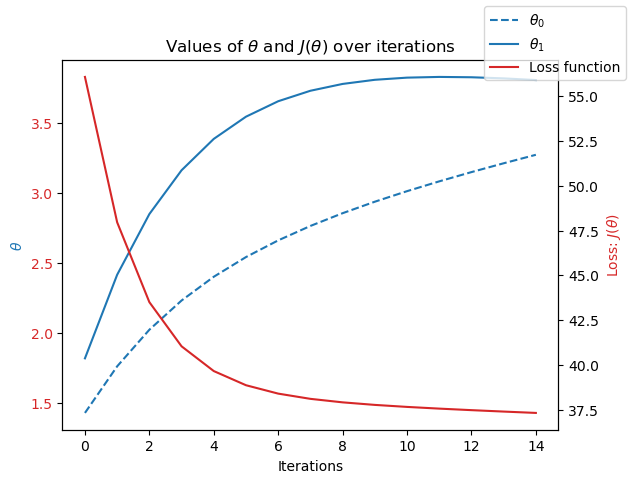

In [50]:
#This will plot your loss, theta0, and theta1.If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();
plt.show()

In [51]:
%%time
# theta range
theta0_vals = np.linspace(-10,10,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-10,10,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: user 1.12 s, sys: 32.2 ms, total: 1.15 s
Wall time: 1.12 s


In [52]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

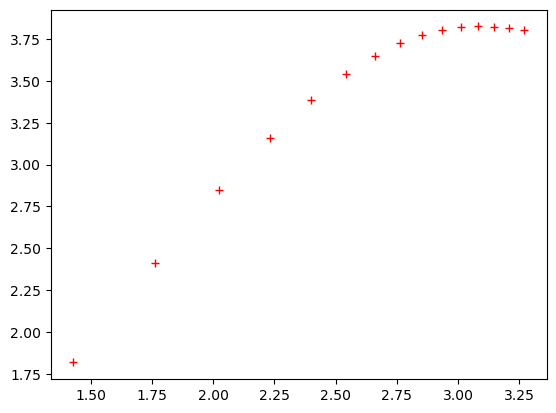

In [53]:
#Here is the same figure as above, with the line the loss function takes toward the minimum.

#X = Theta0
#Y - Theta1
#Z = Loss
#black line = path of loss function over the iterations.
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history, y=theta0_history, z=J_history, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history, theta1_history, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

In [58]:
#Rerun the optimization above, but this time start closer to the objective!
#Find where the black line ends near the lowest X/Y/Z coordinate and make that your guess below.

num_iterations=50 #<---start with the same iterations as above
theta_init=np.array([[-1],[-1]]) #<---make a guess as to a more accurate [x],[y] coordinates near the minimum in the graph above.
alpha= 0.05 #<---start with the same step size as above
theta1, J_history1, theta0_history1, theta1_history1 = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

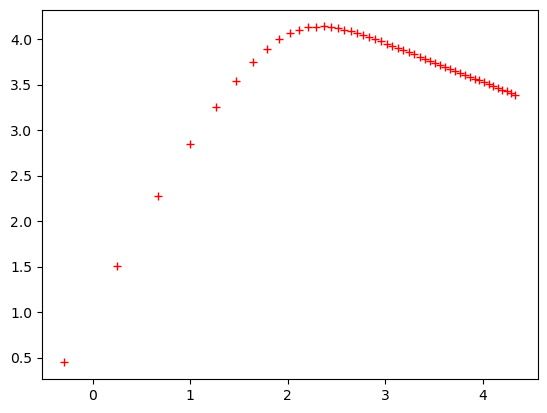

In [59]:
#Let's look at the new loss path on the function. It should start much closer to the goal

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history1, y=theta0_history1, z=J_history1, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history1, theta1_history1, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

In [60]:
#Rerun the optimization above, but this time start closer to the objective!
#Find where the black line ends near the lowest X/Y/Z coordinate and make that your guess below.

num_iterations=50 #<---start with the same iterations as above
theta_init=np.array([[-1],[-1]]) #<---make a guess as to a more accurate [x],[y] coordinates near the minimum in the graph above.
alpha= 0.01 #<---start with the same step size as above
theta1, J_history1, theta0_history1, theta1_history1 = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

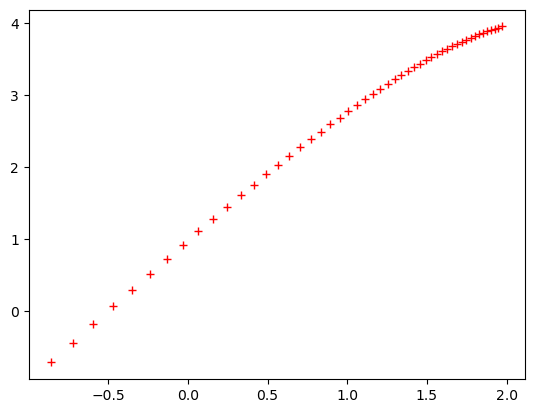

In [61]:
#Let's look at the new loss path on the function. It should start much closer to the goal

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history1, y=theta0_history1, z=J_history1, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history1, theta1_history1, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

STOCKHOLM 1975

In [62]:
#Reduce your dataset to a single year
dfyear_3 = climate[climate['DATE'].astype(str).str.contains('1975')] #<-----INSERT YEAR HERE
dfyear_3

DATE  MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
5479  19750101      1              3.6                -1.9   
5480  19750102      1              2.0                 0.0   
5481  19750103      1              0.9                -1.9   
5482  19750104      1              0.8                -0.8   
5483  19750105      1             -0.5                 3.2   
...        ...    ...              ...                 ...   
5839  19751227     12              2.2                 2.5   
5840  19751228     12             -0.4                 4.2   
5841  19751229     12             -0.5                 1.2   
5842  19751230     12             -0.5                -1.3   
5843  19751231     12             -0.5                -1.4   

      BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
5479                 0.5               7.9                   7.5   
5480                 1.2               4.9                   8.0   
5481                -0.1               2.1                   5.1   
5482                 1.1               5.1                   5.4   
5483                 5.5               7.5                   7.0   
...                  ...               ...                   ...   
5839                 4.5               6.1                   6.0   
5840                 5.0               5.9                   4.0   
5841                 0.2               4.2                   3.5   
5842                 0.4               4.0                   2.8   
5843                -1.3               5.4                   5.8   

      GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
5479               2.7                 7.8               7.4   
5480               4.6                 8.6               7.2   
5481               6.2                 7.9               4.6   
5482               4.8                 4.8               5.7   
5483               4.0                 6.8               6.2   
...                ...                 ...               ...   
5839               5.0                 4.4               6.5   
5840               6.1                 7.0               2.8   
5841               5.1                 6.0               1.6   
5842               3.9                 8.4               1.5   
5843               3.1                 9.6               3.2   

      LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
5479                  0.9                   6.5               6.3   
5480                  1.1                   4.9               6.0   
5481                  1.7                   3.6               6.5   
5482                 -2.7                   3.9               8.1   
5483                 -1.7                   5.6               7.4   
...                   ...                   ...               ...   
5839                 -2.8                   5.4               5.1   
5840                 -3.5                   3.1               5.0   
5841                 -3.6                   2.0               6.4   
5842                 -3.4                   1.9               7.0   
5843                 -3.8                   4.0               5.4   

      MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  SONNBLICK_temp_mean  \
5479                 3.5            -2.3             5.7                -13.5   
5480                 3.0            -0.2             9.3                -11.0   
5481                 0.4             2.2             7.3                 -8.2   
5482                 0.6             0.9             6.7                 -6.5   
5483                 3.9             3.2             4.5                 -7.5   
...                  ...             ...             ...                  ...   
5839                 1.2             6.0             6.6                 -9.4   
5840                -1.0             5.4             7.1                 -5.1   
5841                -1.5             0.3             6.9                 -4.5   
5842                -4.9             6.1

In [64]:
#Drop the DATE and MONTH data as those numbers are not scaled with the rest.
notempyear_3 = dfyear_3.drop(['DATE','MONTH'], axis=1)

In [65]:
#We need to make an index for the year. Create a set of data from 1 to 365 (or to 366 if it's a leap year!)
#We'll scale this by 100 as the index is made. This will help teh gradient descent converge 366 = 3.66

i_3 = np.arange(0.01,3.66,0.01) #<---needs to be one GREATER than the total number of days
index_3 = pd.DataFrame(data = i_3, columns = ['index'])
index_3

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
360   3.61
361   3.62
362   3.63
363   3.64
364   3.65

[365 rows x 1 columns]

In [66]:
n_rows_3 = dfyear_3.shape[0]
n_rows_3

365

In [67]:
#This will translate your chosen weather data into the X and y datasets needed for the optimization function.

X=index_3.to_numpy().reshape(n_rows_3,1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows_3,1))
X = np.concatenate((ones, X), axis=1)
y=dfyear_3['STOCKHOLM_temp_mean'].to_numpy().reshape(n_rows_3,1) #<----INSERT WEATHER STATION HERE

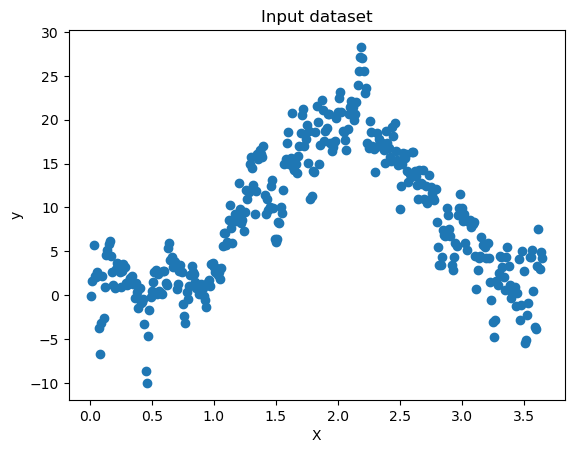

In [68]:
#Look at one year of temperature data over time
plt.scatter(x=index_3['index'], y=dfyear_3['STOCKHOLM_temp_mean']) #<----INSERT WEATHER STATION HERE
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');

In [69]:
#This computes the loss function for the gradiant descent. DO NOT CHANGE!

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [70]:
compute_cost(X,y)

array([65.01735616])

In [71]:
#This is the gradiant descent function. DO NOT CHANGE!

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [72]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=50 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[1],[1]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.05 #<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: user 39.9 ms, sys: 2.7 ms, total: 42.6 ms
Wall time: 40.2 ms


In [73]:
theta

array([[3.42481885],
       [2.51643654]])

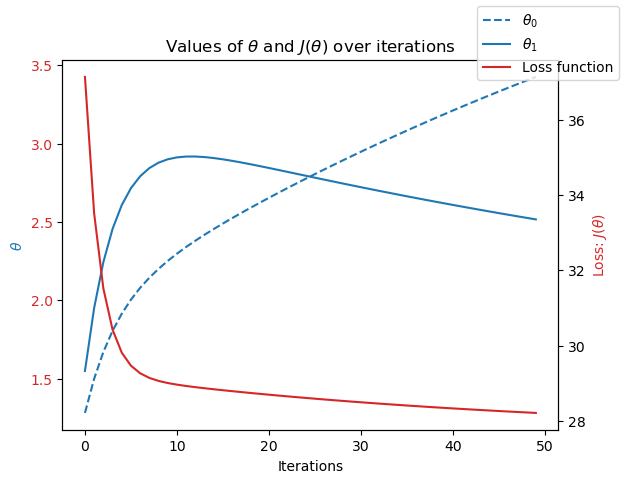

In [74]:
#This will plot your loss, theta0, and theta1.If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();

In [76]:
%%time
# theta range
theta0_vals = np.linspace(-10,100,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-10,100,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: user 1.15 s, sys: 11.1 ms, total: 1.16 s
Wall time: 1.15 s


In [77]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

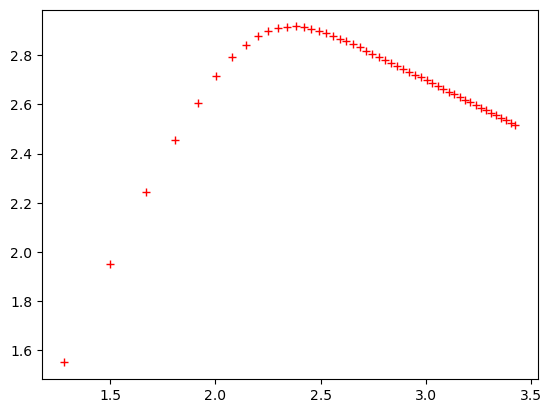

In [78]:
#Here is the same figure as above, with the line the loss function takes toward the minimum.

#X = Theta0
#Y - Theta1
#Z = Loss
#black line = path of loss function over the iterations.
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history, y=theta0_history, z=J_history, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history, theta1_history, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

In [79]:
#Rerun the optimization above, but this time start closer to the objective!
#Find where the black line ends near the lowest X/Y/Z coordinate and make that your guess below.

num_iterations=50 #<---start with the same iterations as above
theta_init=np.array([[0],[0]]) #<---make a guess as to a more accurate [x],[y] coordinates near the minimum in the graph above.
alpha= 0.05 #<---start with the same step size as above
theta1, J_history1, theta0_history1, theta1_history1 = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

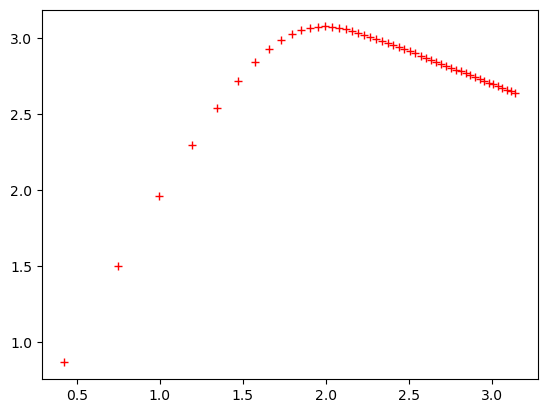

In [80]:
#Let's look at the new loss path on the function. It should start much closer to the goal

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history1, y=theta0_history1, z=J_history1, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history1, theta1_history1, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()